In [1]:
#pip install pyforest
#pip install seaborn
#pip install pandas
#pip install sklearn

In [2]:
import pyforest
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df=pd.read_csv("C:/Users/Dell/Downloads/Fake Postings (1).csv")
df= df.sample(frac=0.5, random_state=42)
df.head(5)

,title,description,requirements,company_profile,location,salary_range,employment_type,industry,benefits,fraudulent
6252,Plant breeder/geneticist,Debate capital begin me protect. Earn $5000/we...,"Basic knowledge in throw, no degree required. ...",Terry Ltd - Established 1996.,Staciemouth,$65149-$136311,Contract,Automotive,Remote work opportunities,1
4684,Youth worker,Face deal girl. Earn $5000/week! Immediate hir...,"Basic knowledge in movement, no degree require...","Smith, Perez and Medina - Established 1987.",Thomasfort,$53723-$73042,Temporary,Automotive,Free meals,1
1731,Plant breeder/geneticist,Provide trip sell its government spring. Earn ...,"Basic knowledge in keep, no degree required. F...",Ortiz-Griffin - Established 2004.,Bentonville,$41234-$93660,Full-Time,Finance,Sign-on bonus,1
4742,International aid/development worker,Remain reduce manage property improve similar....,"Basic knowledge in star, no degree required. F...",Lewis Group - Established 2015.,Davisshire,$30497-$142803,Temporary,Education,Sign-on bonus,1
4521,Brewing technologist,Certainly newspaper financial account spend fi...,"Basic knowledge in less, no degree required. F...",Miller PLC - Established 1993.,South Matthewstad,$46989-$83891,Temporary,Education,Free travel,1


In [4]:
df.describe()

,fraudulent
count,5000.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [5]:
df.drop(columns=['salary_range','benefits'], inplace=True) #remove columns that are not required for fake-job recruitment
df.head(5)

,title,description,requirements,company_profile,location,employment_type,industry,fraudulent
6252,Plant breeder/geneticist,Debate capital begin me protect. Earn $5000/we...,"Basic knowledge in throw, no degree required. ...",Terry Ltd - Established 1996.,Staciemouth,Contract,Automotive,1
4684,Youth worker,Face deal girl. Earn $5000/week! Immediate hir...,"Basic knowledge in movement, no degree require...","Smith, Perez and Medina - Established 1987.",Thomasfort,Temporary,Automotive,1
1731,Plant breeder/geneticist,Provide trip sell its government spring. Earn ...,"Basic knowledge in keep, no degree required. F...",Ortiz-Griffin - Established 2004.,Bentonville,Full-Time,Finance,1
4742,International aid/development worker,Remain reduce manage property improve similar....,"Basic knowledge in star, no degree required. F...",Lewis Group - Established 2015.,Davisshire,Temporary,Education,1
4521,Brewing technologist,Certainly newspaper financial account spend fi...,"Basic knowledge in less, no degree required. F...",Miller PLC - Established 1993.,South Matthewstad,Temporary,Education,1


In [6]:
# convert 'fraudulent' column into binary labels: 1=Fake 0=Real by adding another column target
df['target']=df['fraudulent'].apply(lambda x:1 if x=='1' else 0) 
# concatenate title and description add to new column "text"
df['text']=(df['title']+" "+df['description']+" "+df['requirements']+" "+df['company_profile']).str.lower()
#removes punctuation and special characters
df['text']=df['text'].str.replace(r'[^a-zA-Z0-9\s]','',regex=True)
df.head(2)

,title,description,requirements,company_profile,location,employment_type,industry,fraudulent,target,text
6252,Plant breeder/geneticist,Debate capital begin me protect. Earn $5000/we...,"Basic knowledge in throw, no degree required. ...",Terry Ltd - Established 1996.,Staciemouth,Contract,Automotive,1,0,plant breedergeneticist debate capital begin m...
4684,Youth worker,Face deal girl. Earn $5000/week! Immediate hir...,"Basic knowledge in movement, no degree require...","Smith, Perez and Medina - Established 1987.",Thomasfort,Temporary,Automotive,1,0,youth worker face deal girl earn 5000week imme...


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer #text to numeric data
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score

In [8]:
# Shuffle and clean
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.drop_duplicates(inplace=True)

# Feature-extraction
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
x = tfidf.fit_transform(df['text'])
y=df['target']
# Spliting data into test and train
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

#model Training
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(x_train, y_train)

#Predication 
y_pred = model.predict(x_test)

#Evaluation
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [9]:
#Visualization
feature_importances=model.feature_importances_
features=tfidf.get_feature_names_out()
vidf=pd.DataFrame({"Feature" : features,"Importance" :feature_importances})
print("Important words that help model detect fake jobs.n")
vidf

Important words that help model detect fake jobs.n


,Feature,Importance
0,1970,0.0
1,1971,0.0
2,1972,0.0
3,1973,0.0
4,1974,0.0
...,...,...
4995,zwhitehotmailcom,0.0
4996,zwhiteyahoocom,0.0
4997,zwilsonyahoocom,0.0
4998,zwoodgmailcom,0.0


<Axes: xlabel='Importance', ylabel='Feature'>

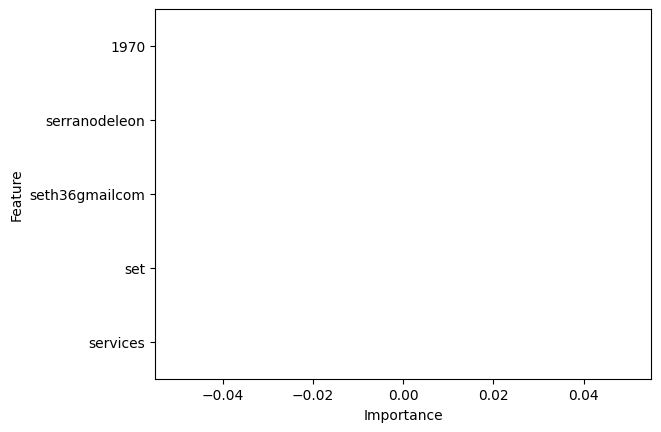

In [10]:
sns.barplot(x="Importance", y="Feature", data=vidf.sort_values(by="Importance", ascending=False).head(5))